In [2]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, KFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report,mean_squared_error, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler,label_binarize
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier
import joblib
import warnings

In [3]:
# Disabling the warnings
warnings.filterwarnings('ignore')

In [4]:
# create a shortcut for project folder in your own drive
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/Health_Info_Project_DiabPredict

Mounted at /content/drive/
/content/drive/.shortcut-targets-by-id/1OERFEg5UzRz6Cm2adaU48UWDmpdkAy-S/Health Info Project DiabPredict


In [5]:
# Load the data
df = pd.read_csv("cleaned_diabetes_012_health_indicators_BRFSS2015.csv")
print(df.shape)

(229781, 22)


In [6]:
df.head(2)

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0  9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0  7.0        6.0   

   Income  
0     3.0  
1     1.0  

[2 rows x 22 columns]

In [7]:
# Split the data into features and labels
X = df.drop(["Diabetes_012"], axis = 1)
Y = df["Diabetes_012"]

In [8]:
# Binarize the labels
def binarize(Y):
  return label_binarize(Y, classes=[0,1,2])

In [9]:
# Plot AUC-ROC curves
from sklearn.metrics import roc_auc_score, roc_curve, auc

def plot_roc(Y_test, Y_score):
  n_classes = 3
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], Y_score[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])
      print("ROC Score: ", roc_auc[i])


  # Plot of a ROC curve for a specific class
  for i in range(n_classes):
      plt.figure()
      plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
      plt.plot([0, 1], [0, 1], 'k--')
      plt.xlim([0.0, 1.0])
      plt.ylim([0.0, 1.05])
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title('Receiver operating characteristic example')
      plt.legend(loc="lower right")
      plt.show()

In [22]:
# Split the data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [23]:
# Initialize standard scaler
sc = StandardScaler()

In [12]:
# Turn data into multiclass
def turn_multiclass(model):
  return OneVsRestClassifier(model)

Linear Regression

For fold 0
              precision    recall  f1-score   support

           0       0.97      0.47      0.64     38011
           1       0.04      0.02      0.02       926
           2       0.46      0.33      0.38      7020

   micro avg       0.85      0.44      0.58     45957
   macro avg       0.49      0.27      0.35     45957
weighted avg       0.87      0.44      0.59     45957
 samples avg       0.44      0.44      0.44     45957

ROC Score:  0.8006482855854324
ROC Score:  0.641970340758296
ROC Score:  0.8062690849057288


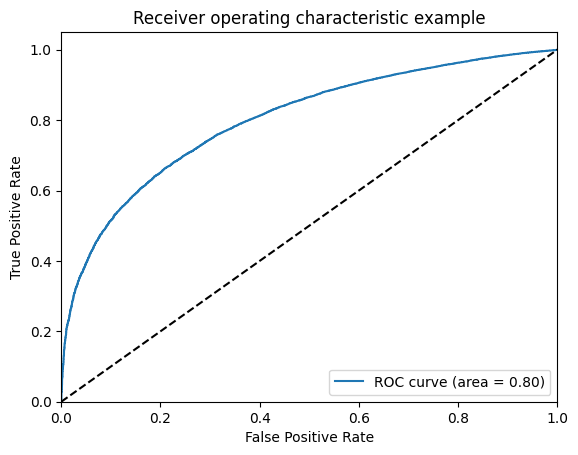

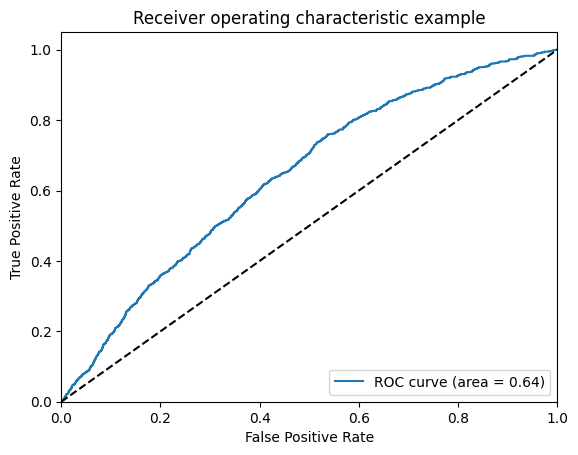

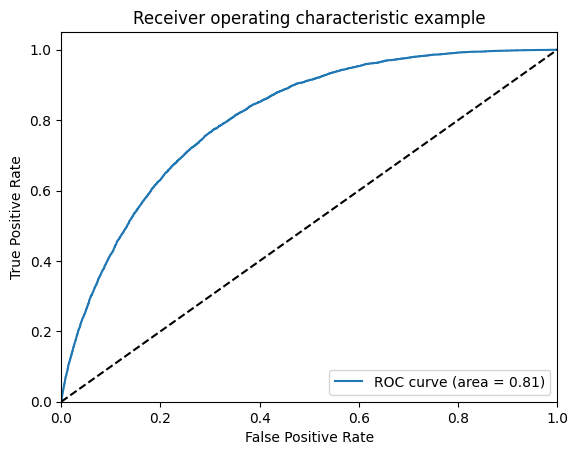

Scores
0.4402811323628609
For fold 1
              precision    recall  f1-score   support

           0       0.97      0.47      0.64     38011
           1       0.06      0.03      0.04       925
           2       0.45      0.33      0.38      7020

   micro avg       0.84      0.44      0.58     45956
   macro avg       0.49      0.28      0.35     45956
weighted avg       0.87      0.44      0.59     45956
 samples avg       0.44      0.44      0.44     45956

ROC Score:  0.7978392462623726
ROC Score:  0.6602273989029779
ROC Score:  0.8032887027846706


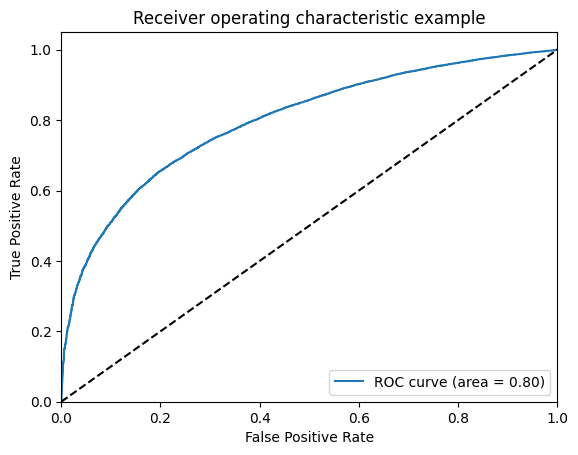

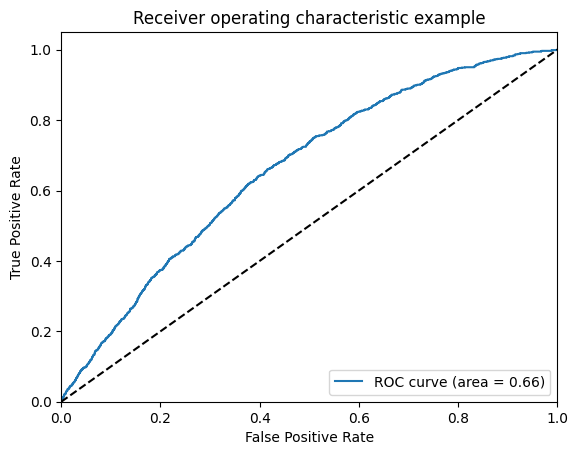

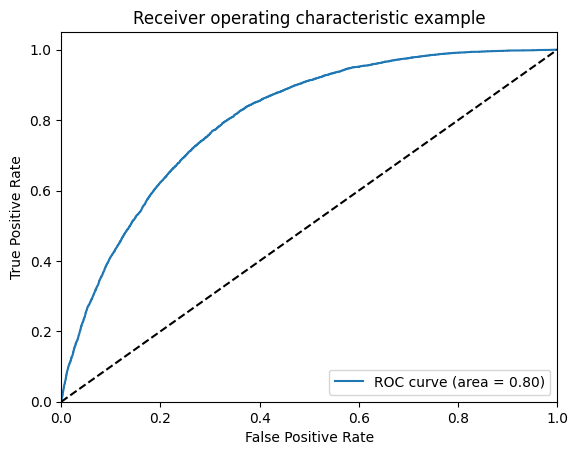

Scores
0.44118287057185135
For fold 2
              precision    recall  f1-score   support

           0       0.97      0.47      0.64     38011
           1       0.04      0.02      0.02       926
           2       0.45      0.32      0.38      7019

   micro avg       0.84      0.44      0.58     45956
   macro avg       0.48      0.27      0.34     45956
weighted avg       0.87      0.44      0.58     45956
 samples avg       0.44      0.44      0.44     45956

ROC Score:  0.7995594316301966
ROC Score:  0.6593386026786078
ROC Score:  0.8039066420645831


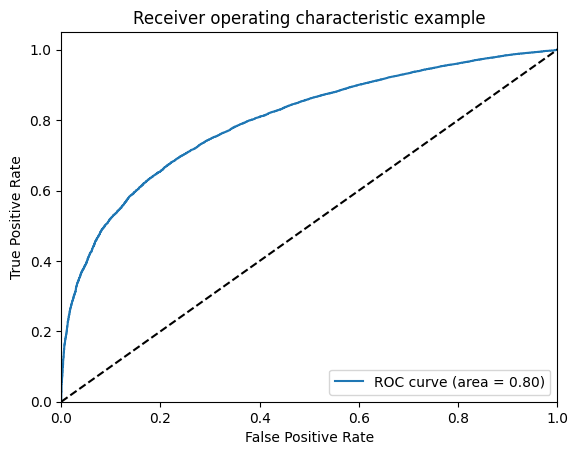

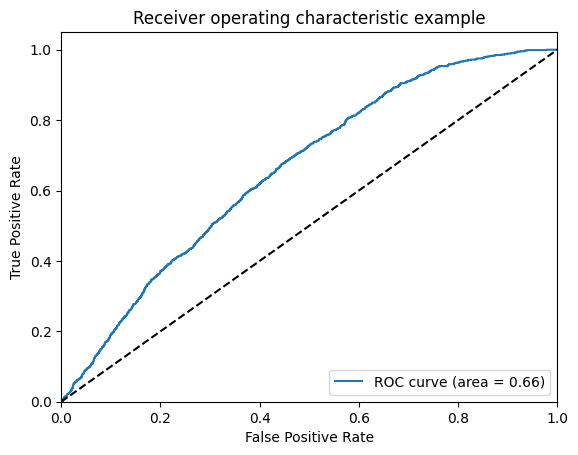

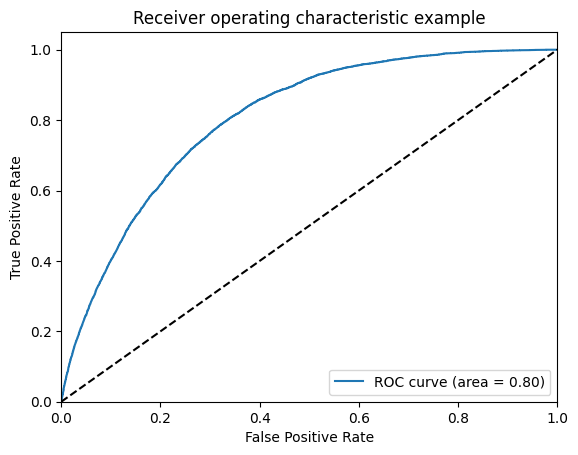

Scores
0.4398772739141788
For fold 3
              precision    recall  f1-score   support

           0       0.96      0.48      0.64     38011
           1       0.04      0.02      0.03       926
           2       0.46      0.33      0.39      7019

   micro avg       0.84      0.45      0.58     45956
   macro avg       0.49      0.28      0.35     45956
weighted avg       0.87      0.45      0.59     45956
 samples avg       0.45      0.45      0.45     45956

ROC Score:  0.7992392765507134
ROC Score:  0.6489301828538594
ROC Score:  0.8040480641988028


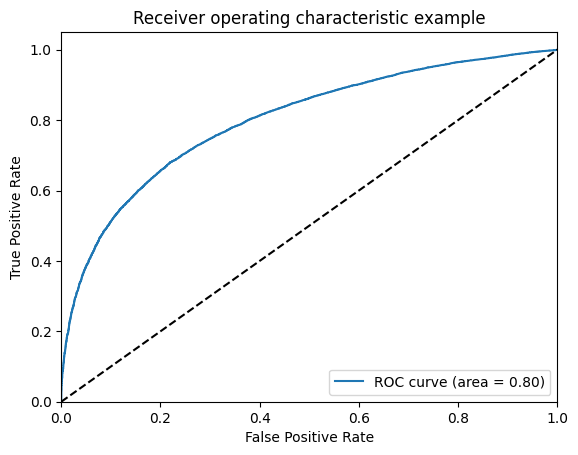

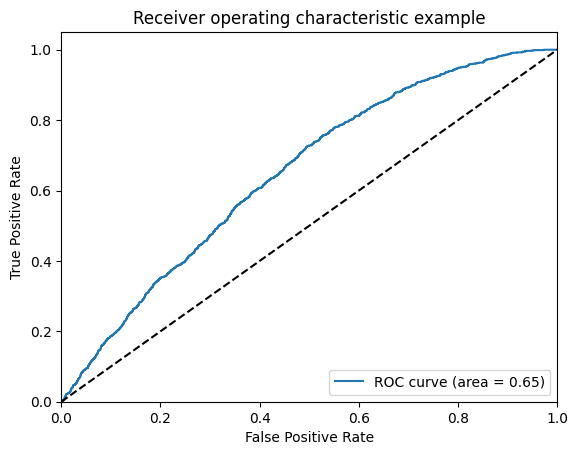

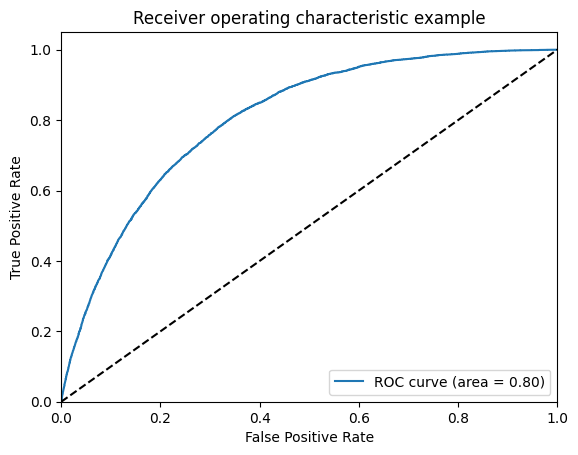

Scores
0.44440334232744366
For fold 4
              precision    recall  f1-score   support

           0       0.97      0.48      0.64     38011
           1       0.03      0.02      0.02       926
           2       0.46      0.33      0.38      7019

   micro avg       0.84      0.45      0.58     45956
   macro avg       0.48      0.28      0.35     45956
weighted avg       0.87      0.45      0.59     45956
 samples avg       0.45      0.45      0.45     45956

ROC Score:  0.7990322681425779
ROC Score:  0.6383956052336599
ROC Score:  0.803879969792623


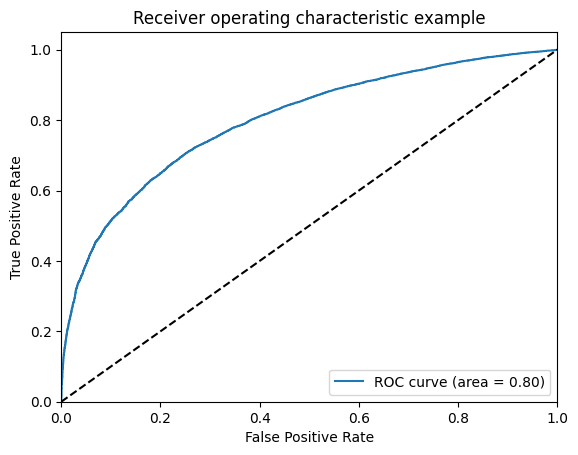

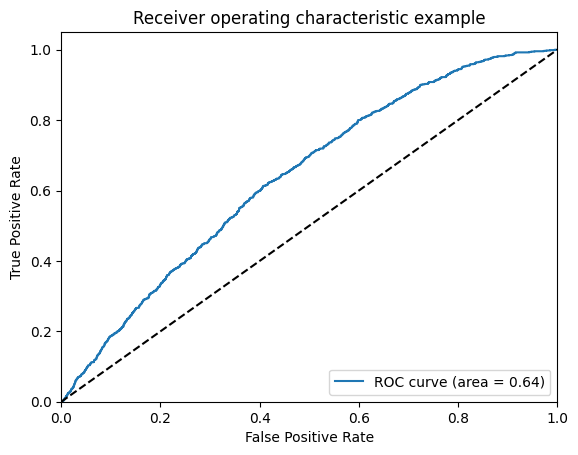

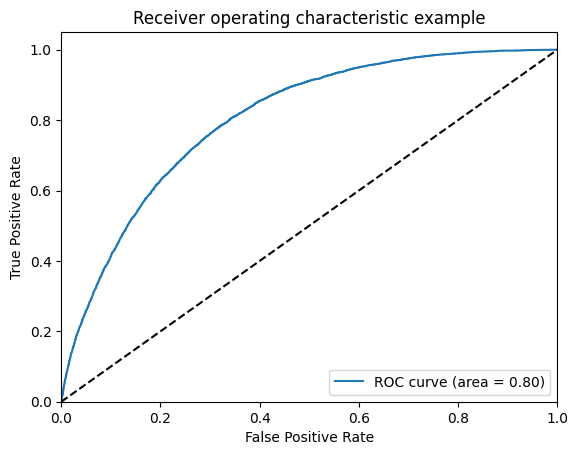

Scores
0.44529550004351987
For K = 5, Mean Accuracy Value 0.4422080238439709


In [13]:
# Applying undersampling technique : K-fold cross (where K = 5) validation and evaluating the performance
K = 5
kf = StratifiedKFold(n_splits = K, shuffle = True, random_state = 42)
accuracyList = np.zeros(K)
for fold, (train_index, test_index) in enumerate(kf.split(X, Y)):
    X_train, Y_train = X.iloc[train_index], Y.iloc[train_index]
    X_test, Y_test = X.iloc[test_index], Y.iloc[test_index]
    
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    Y_test = binarize(Y_test)
    Y_train = binarize(Y_train)

    pca = PCA()
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)

    sm = SMOTE()
    X_train_oversampled, Y_train_oversampled = sm.fit_resample(X_train, Y_train)
    Y_train_oversampled = binarize(Y_train_oversampled)
    
    print('For fold '+str(fold))

    model = LogisticRegression()
    model = turn_multiclass(model)
    model_fit = model.fit(X_train_oversampled, Y_train_oversampled)
    Y_pred = model_fit.predict(X_test)
    print(classification_report(Y_test, Y_pred, output_dict = False))

    # Y_score = model_fit.decision_function(X_test)
    Y_proba = model.predict_proba(X_test)
    plot_roc(Y_test, Y_proba)


    acc_score = model_fit.score(X_test, Y_test)
    print('Scores')
    print(acc_score)
    accuracyList[fold] = acc_score
    # print('Explained variance is : '+str(pca.explained_variance_ratio_.sum()))
print('For K = '+str(K)+', Mean Accuracy Value '+str(np.mean(accuracyList)))

KNN Classifier 

For fold 0
              precision    recall  f1-score   support

           0       0.90      0.66      0.76     38011
           1       0.03      0.12      0.05       926
           2       0.28      0.55      0.37      7020

   micro avg       0.63      0.63      0.63     45957
   macro avg       0.40      0.44      0.39     45957
weighted avg       0.79      0.63      0.68     45957
 samples avg       0.63      0.63      0.63     45957

ROC Score:  0.7021858573097222
ROC Score:  0.5196571807288216
ROC Score:  0.6858615315982345


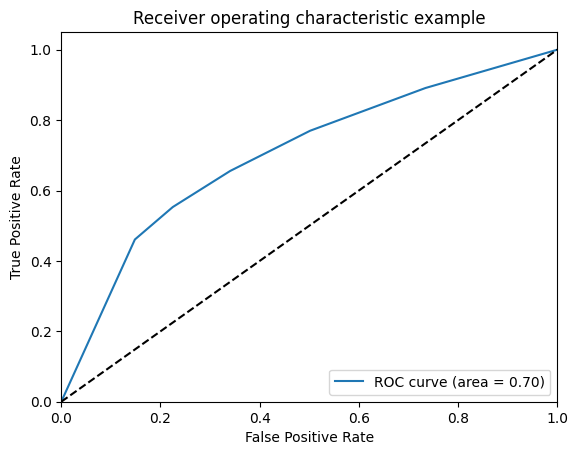

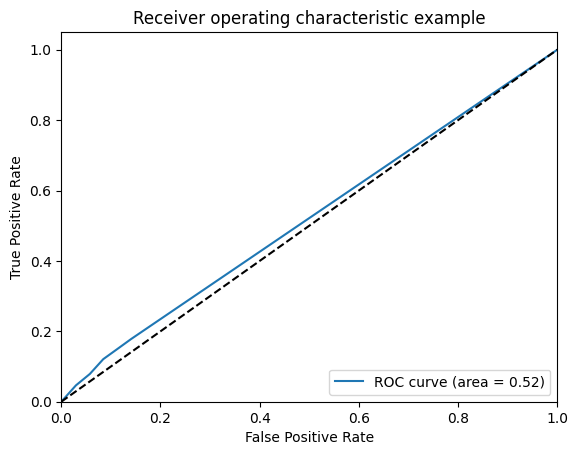

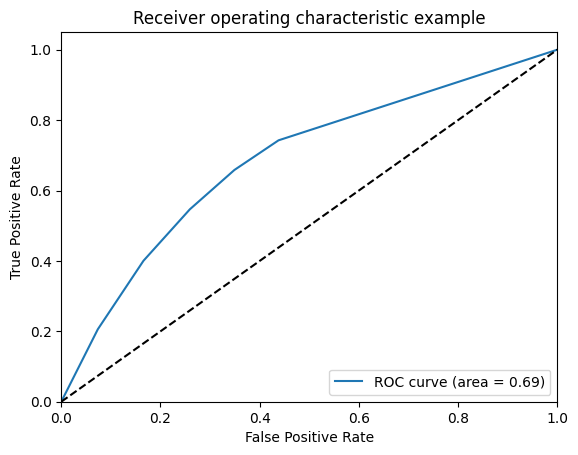

Scores
0.6281088843919316
For fold 1
              precision    recall  f1-score   support

           0       0.90      0.65      0.76     38011
           1       0.03      0.12      0.05       925
           2       0.27      0.54      0.36      7020

   micro avg       0.63      0.63      0.63     45956
   macro avg       0.40      0.44      0.39     45956
weighted avg       0.79      0.63      0.68     45956
 samples avg       0.63      0.63      0.63     45956

ROC Score:  0.7014811170804967
ROC Score:  0.5317770280773545
ROC Score:  0.6817872081850148


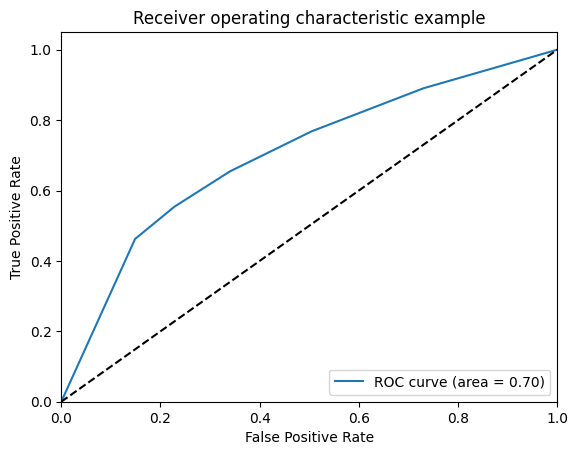

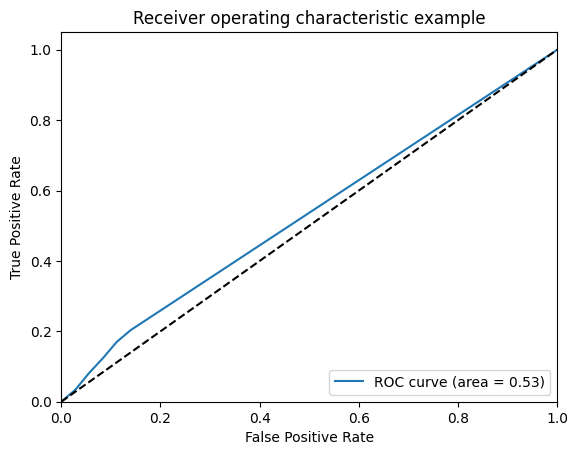

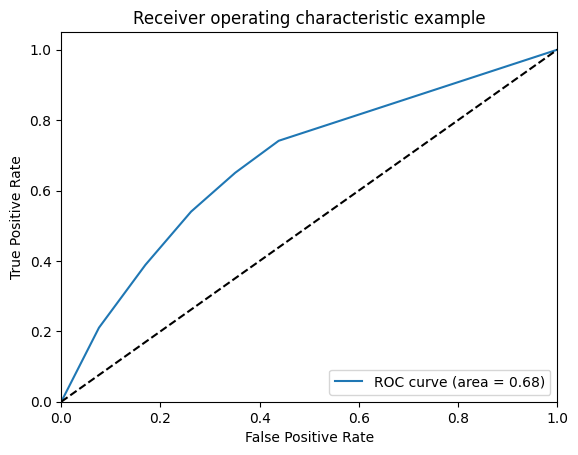

Scores
0.6263599965184089
For fold 2
              precision    recall  f1-score   support

           0       0.90      0.66      0.76     38011
           1       0.02      0.09      0.04       926
           2       0.27      0.54      0.36      7019

   micro avg       0.63      0.63      0.63     45956
   macro avg       0.40      0.43      0.39     45956
weighted avg       0.79      0.63      0.68     45956
 samples avg       0.63      0.63      0.63     45956

ROC Score:  0.6954669542762115
ROC Score:  0.5100606914804577
ROC Score:  0.6828850911579002


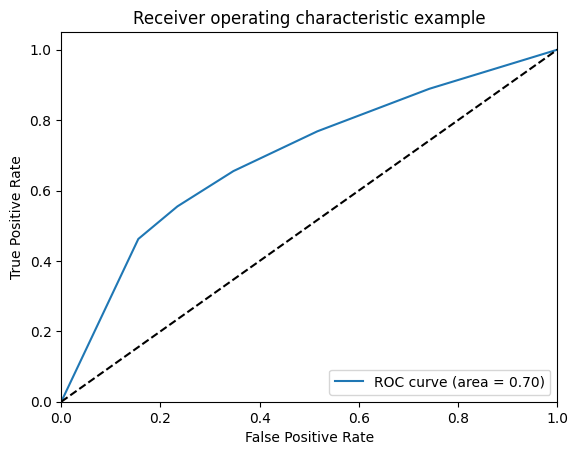

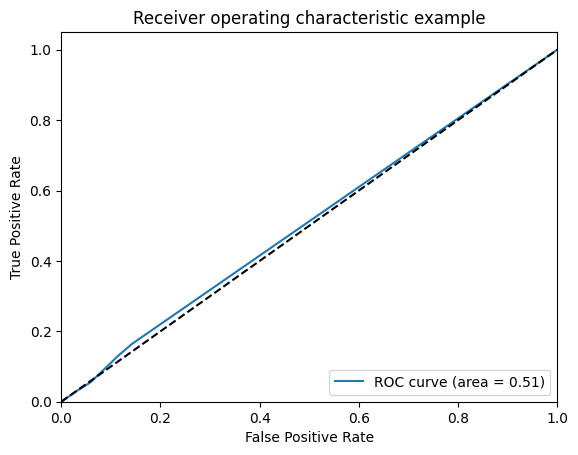

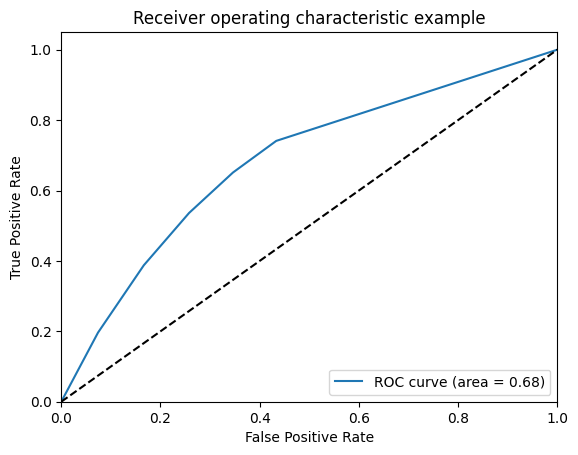

Scores
0.6257071981895727
For fold 3
              precision    recall  f1-score   support

           0       0.90      0.66      0.76     38011
           1       0.03      0.12      0.05       926
           2       0.27      0.54      0.36      7019

   micro avg       0.64      0.63      0.63     45956
   macro avg       0.40      0.44      0.39     45956
weighted avg       0.79      0.63      0.69     45956
 samples avg       0.63      0.63      0.63     45956

ROC Score:  0.7038795003513192
ROC Score:  0.5148538243522797
ROC Score:  0.6818418575364196


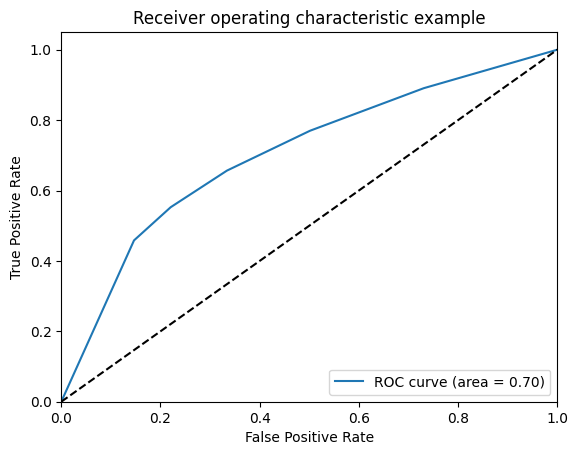

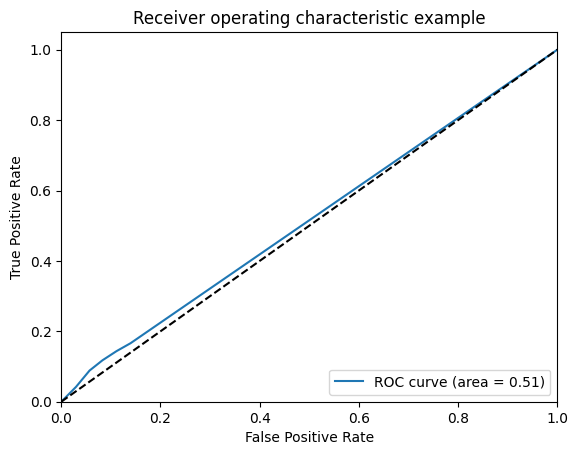

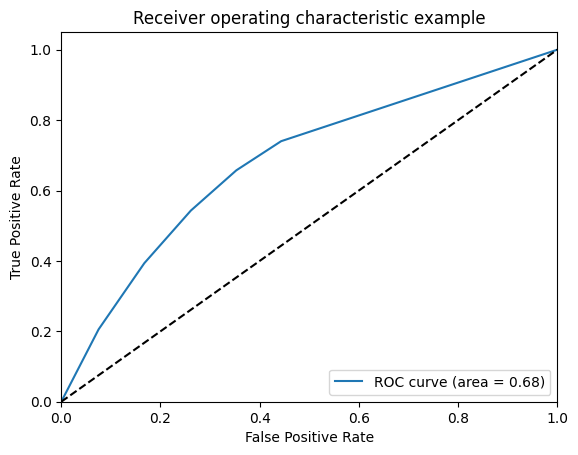

Scores
0.6284054312820959
For fold 4
              precision    recall  f1-score   support

           0       0.90      0.66      0.76     38011
           1       0.03      0.11      0.04       926
           2       0.27      0.54      0.36      7019

   micro avg       0.63      0.63      0.63     45956
   macro avg       0.40      0.44      0.39     45956
weighted avg       0.79      0.63      0.68     45956
 samples avg       0.63      0.63      0.63     45956

ROC Score:  0.7015265727706028
ROC Score:  0.5222907790294831
ROC Score:  0.6808588546946545


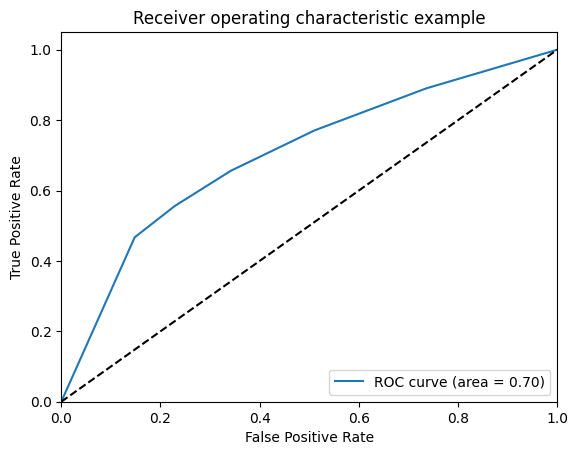

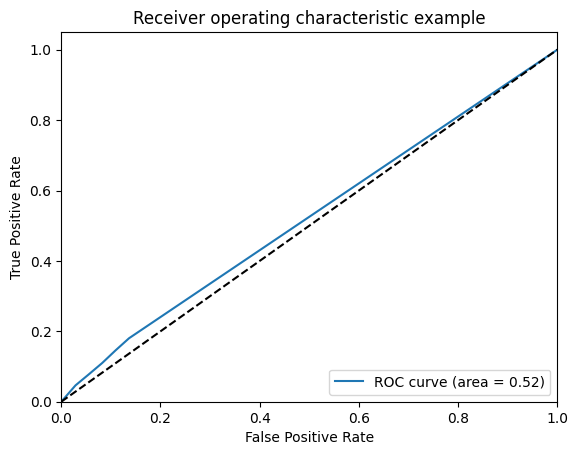

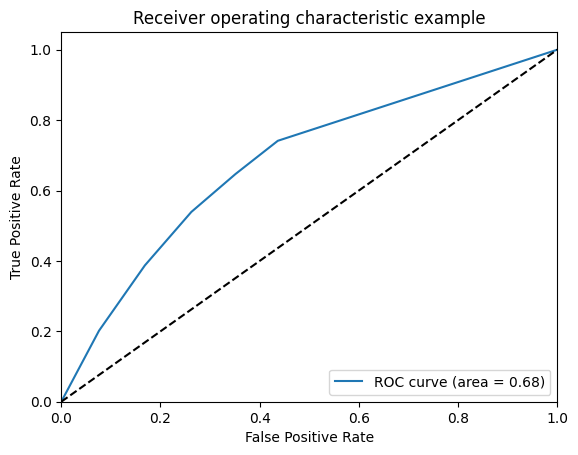

Scores
0.6273174340673688
For K = 5, Mean Accuracy Value 0.6271797888898756


In [14]:
# Applying undersampling technique : K-fold cross (where K = 5) validation and evaluating the performance
K = 5
kf = StratifiedKFold(n_splits = K, shuffle = True, random_state = 42)
accuracyList = np.zeros(K)
for fold, (train_index, test_index) in enumerate(kf.split(X, Y)):
    X_train, Y_train = X.iloc[train_index], Y.iloc[train_index]
    X_test, Y_test = X.iloc[test_index], Y.iloc[test_index]
    
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    Y_test = binarize(Y_test)
    Y_train = binarize(Y_train)

    pca = PCA()
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)

    sm = SMOTE()
    X_train_oversampled, Y_train_oversampled = sm.fit_resample(X_train, Y_train)
    Y_train_oversampled = binarize(Y_train_oversampled)
    
    print('For fold '+str(fold))

    model = KNeighborsClassifier()
    model = turn_multiclass(model)
    model_fit = model.fit(X_train_oversampled, Y_train_oversampled)
    Y_pred = model_fit.predict(X_test)
    print(classification_report(Y_test, Y_pred, output_dict = False))

    # Y_score = model_fit.decision_function(X_test)
    Y_proba = model.predict_proba(X_test)
    plot_roc(Y_test, Y_proba)


    acc_score = model_fit.score(X_test, Y_test)
    print('Scores')
    print(acc_score)
    accuracyList[fold] = acc_score
    # print('Explained variance is : '+str(pca.explained_variance_ratio_.sum()))
print('For K = '+str(K)+', Mean Accuracy Value '+str(np.mean(accuracyList)))

Gaussian Naive Bayes

For fold 0
              precision    recall  f1-score   support

           0       0.96      0.47      0.63     38011
           1       0.03      0.10      0.05       926
           2       0.37      0.37      0.37      7020

   micro avg       0.72      0.45      0.55     45957
   macro avg       0.45      0.31      0.35     45957
weighted avg       0.85      0.45      0.58     45957
 samples avg       0.45      0.45      0.45     45957

ROC Score:  0.7798785533772818
ROC Score:  0.5563071549510433
ROC Score:  0.7711455322634921


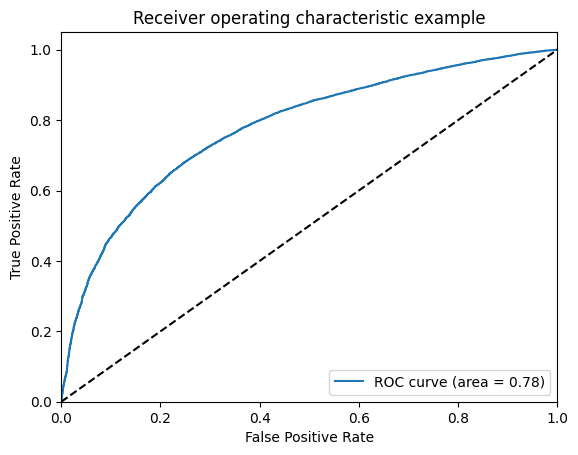

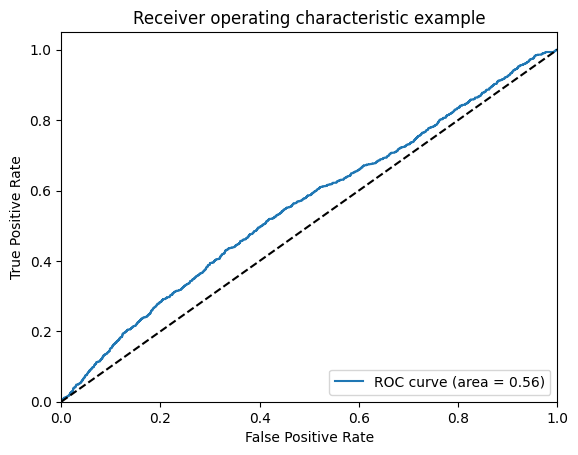

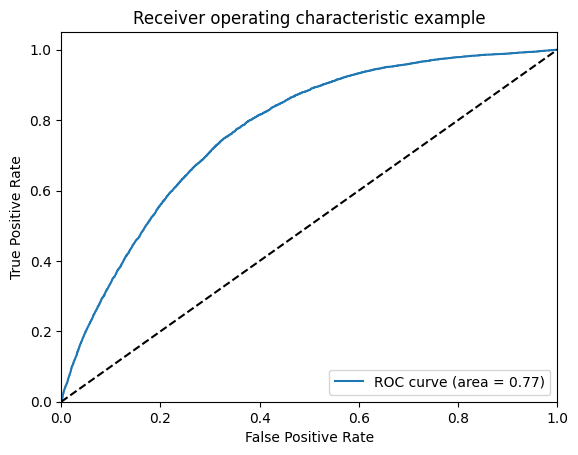

Scores
0.4463955436603782
For fold 1
              precision    recall  f1-score   support

           0       0.96      0.47      0.63     38011
           1       0.04      0.11      0.05       925
           2       0.36      0.37      0.37      7020

   micro avg       0.71      0.45      0.55     45956
   macro avg       0.45      0.32      0.35     45956
weighted avg       0.85      0.45      0.58     45956
 samples avg       0.45      0.45      0.45     45956

ROC Score:  0.7739498746338525
ROC Score:  0.5601280919390667
ROC Score:  0.7631109649877629


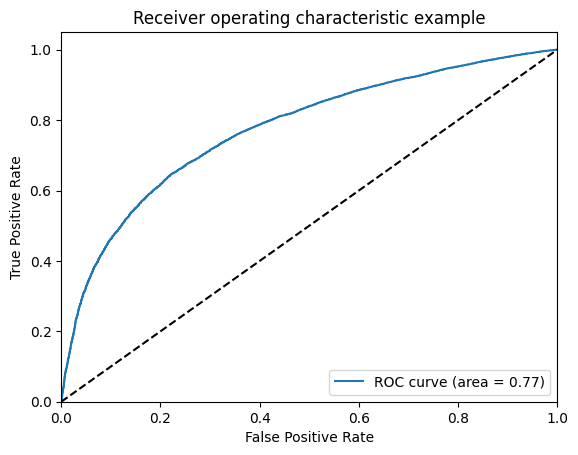

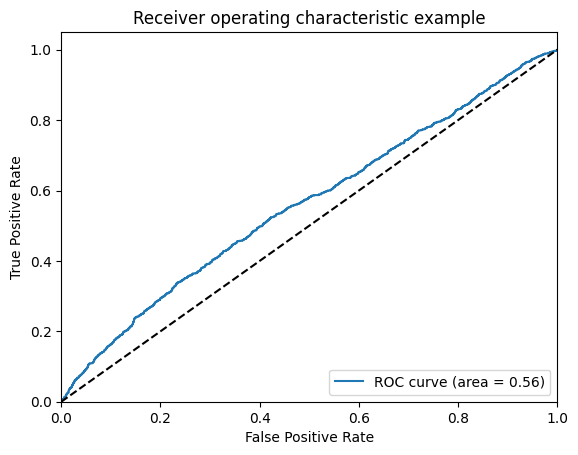

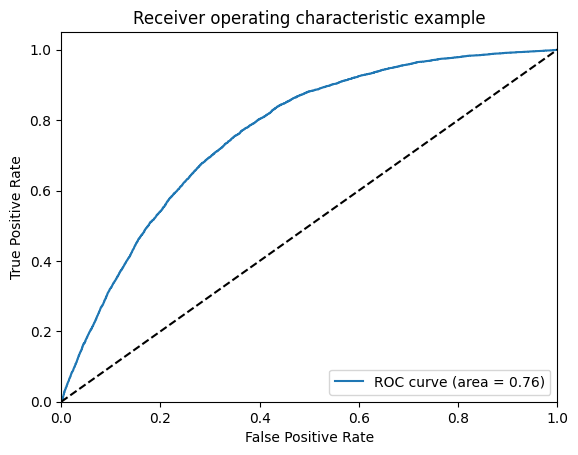

Scores
0.4468839759770215
For fold 2
              precision    recall  f1-score   support

           0       0.96      0.47      0.63     38011
           1       0.03      0.09      0.05       926
           2       0.36      0.38      0.37      7019

   micro avg       0.72      0.45      0.56     45956
   macro avg       0.45      0.31      0.35     45956
weighted avg       0.85      0.45      0.58     45956
 samples avg       0.45      0.45      0.45     45956

ROC Score:  0.7746262745080963
ROC Score:  0.5712890710248844
ROC Score:  0.7641167257508992


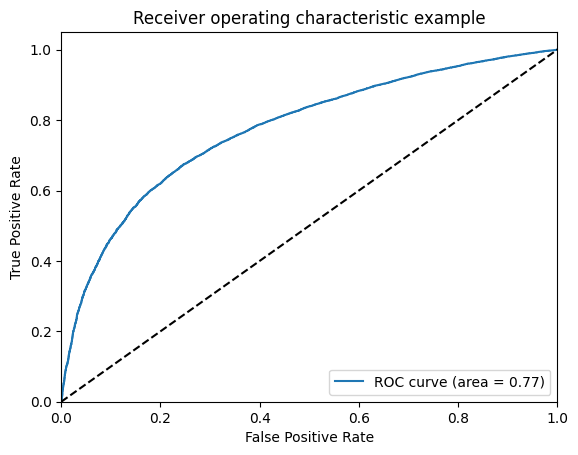

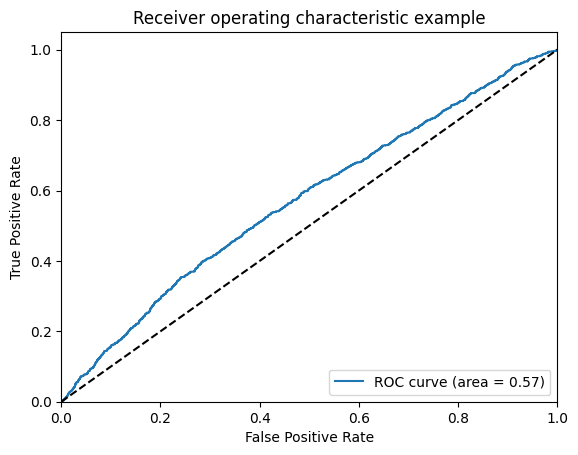

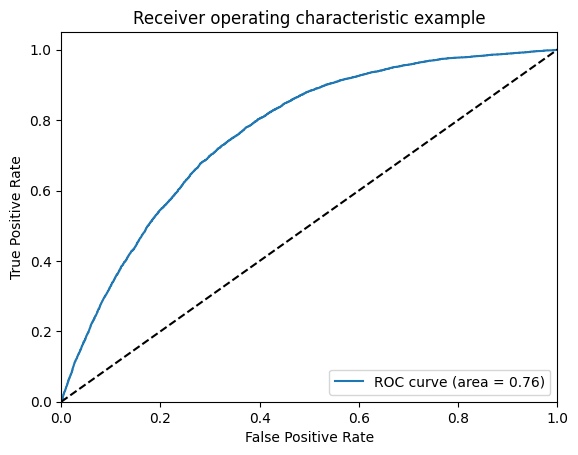

Scores
0.4496039690138393
For fold 3
              precision    recall  f1-score   support

           0       0.96      0.47      0.63     38011
           1       0.03      0.10      0.05       926
           2       0.37      0.38      0.37      7019

   micro avg       0.72      0.45      0.55     45956
   macro avg       0.45      0.32      0.35     45956
weighted avg       0.85      0.45      0.58     45956
 samples avg       0.45      0.45      0.45     45956

ROC Score:  0.7782510392184012
ROC Score:  0.5638160472811742
ROC Score:  0.7667377800406978


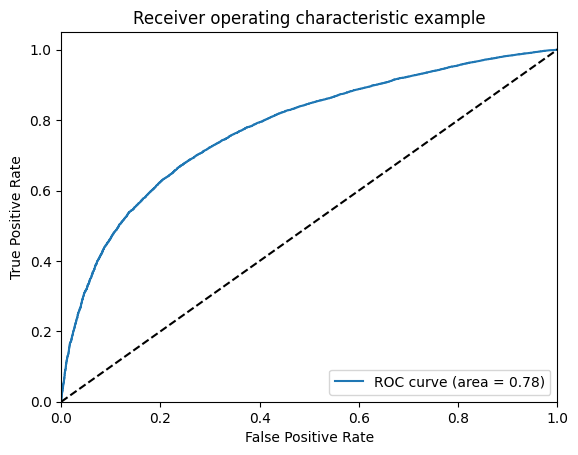

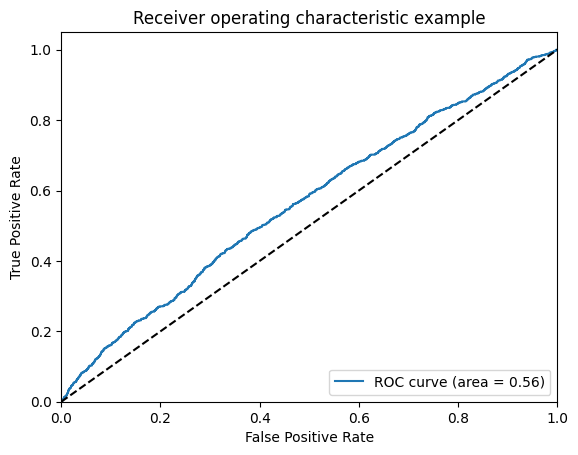

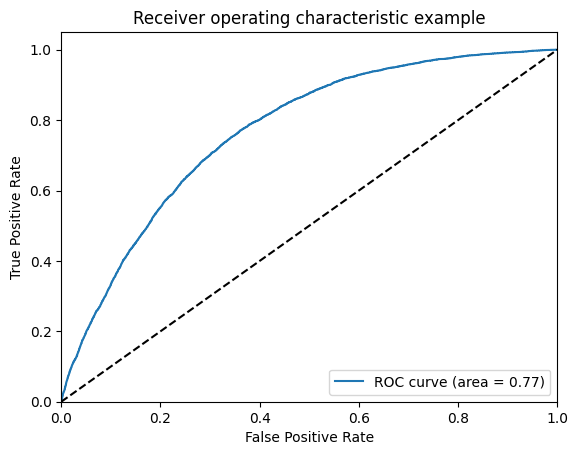

Scores
0.4460135782052398
For fold 4
              precision    recall  f1-score   support

           0       0.96      0.48      0.64     38011
           1       0.03      0.09      0.05       926
           2       0.37      0.37      0.37      7019

   micro avg       0.74      0.45      0.56     45956
   macro avg       0.45      0.31      0.35     45956
weighted avg       0.85      0.45      0.58     45956
 samples avg       0.45      0.45      0.45     45956

ROC Score:  0.7779343659570308
ROC Score:  0.5734281057648632
ROC Score:  0.7692030122063871


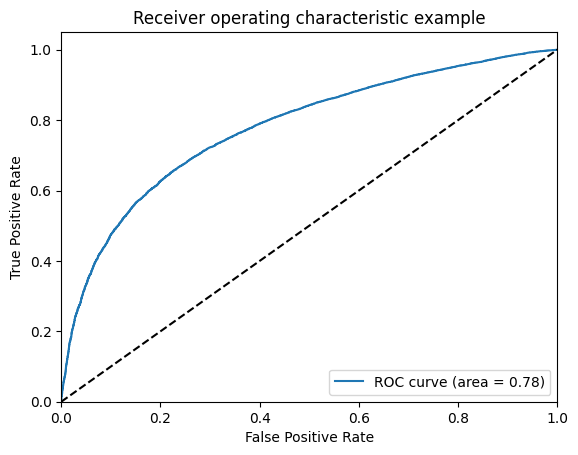

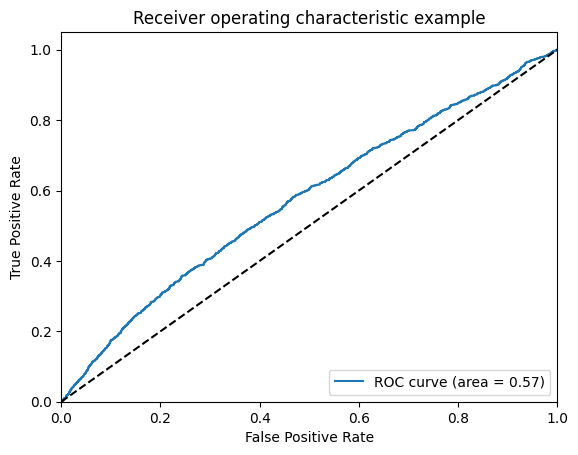

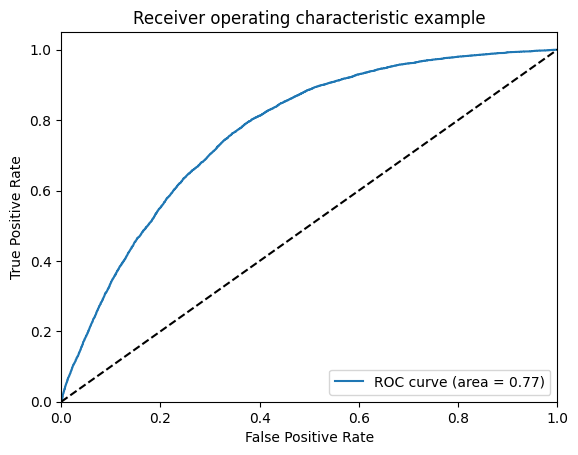

Scores
0.44984332840107927
For K = 5, Mean Accuracy Value 0.44774807905151165


In [15]:
K = 5
kf = StratifiedKFold(n_splits = K, shuffle = True, random_state = 42)
accuracyList = np.zeros(K)
for fold, (train_index, test_index) in enumerate(kf.split(X, Y)):
    X_train, Y_train = X.iloc[train_index], Y.iloc[train_index]
    X_test, Y_test = X.iloc[test_index], Y.iloc[test_index]
    
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    Y_test = binarize(Y_test)
    Y_train = binarize(Y_train)

    pca = PCA()
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)

    sm = SMOTE()
    X_train_oversampled, Y_train_oversampled = sm.fit_resample(X_train, Y_train)
    Y_train_oversampled = binarize(Y_train_oversampled)
    
    print('For fold '+str(fold))

    model = GaussianNB()
    model = turn_multiclass(model)
    model_fit = model.fit(X_train_oversampled, Y_train_oversampled)
    Y_pred = model_fit.predict(X_test)
    print(classification_report(Y_test, Y_pred, output_dict = False))

    # Y_score = model_fit.decision_function(X_test)
    Y_proba = model.predict_proba(X_test)
    plot_roc(Y_test, Y_proba)


    acc_score = model_fit.score(X_test, Y_test)
    print('Scores')
    print(acc_score)
    accuracyList[fold] = acc_score
    # print('Explained variance is : '+str(pca.explained_variance_ratio_.sum()))
print('For K = '+str(K)+', Mean Accuracy Value '+str(np.mean(accuracyList)))

Bernoulli Naive Bayes

For fold 0
              precision    recall  f1-score   support

           0       0.96      0.42      0.58     38011
           1       0.04      0.02      0.03       926
           2       0.38      0.24      0.29      7020

   micro avg       0.82      0.38      0.52     45957
   macro avg       0.46      0.23      0.30     45957
weighted avg       0.85      0.38      0.52     45957
 samples avg       0.38      0.38      0.38     45957

ROC Score:  0.7463508682157616
ROC Score:  0.6292625123666907
ROC Score:  0.7569466075193276


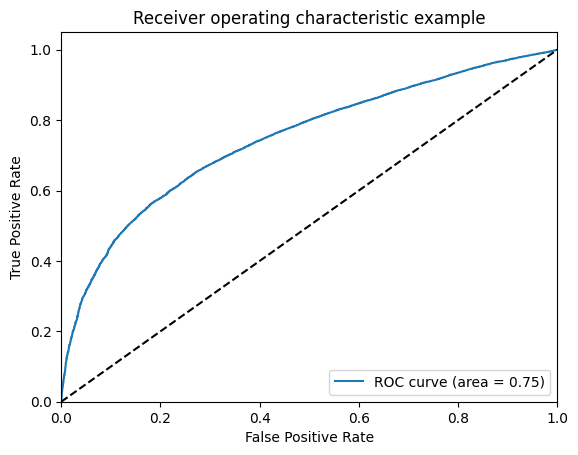

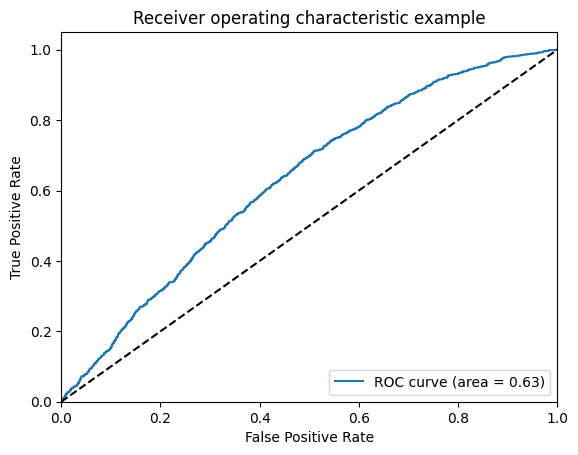

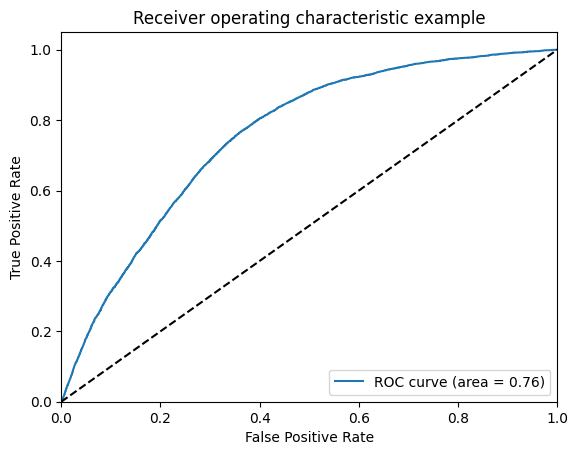

Scores
0.37765737537263094
For fold 1
              precision    recall  f1-score   support

           0       0.96      0.41      0.57     38011
           1       0.04      0.02      0.03       925
           2       0.37      0.24      0.29      7020

   micro avg       0.81      0.38      0.51     45956
   macro avg       0.46      0.22      0.30     45956
weighted avg       0.85      0.38      0.52     45956
 samples avg       0.38      0.38      0.38     45956

ROC Score:  0.7421697346097968
ROC Score:  0.6326960706348239
ROC Score:  0.7524634845289253


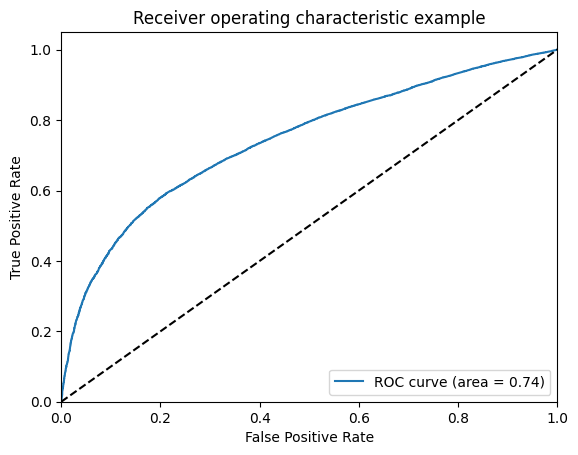

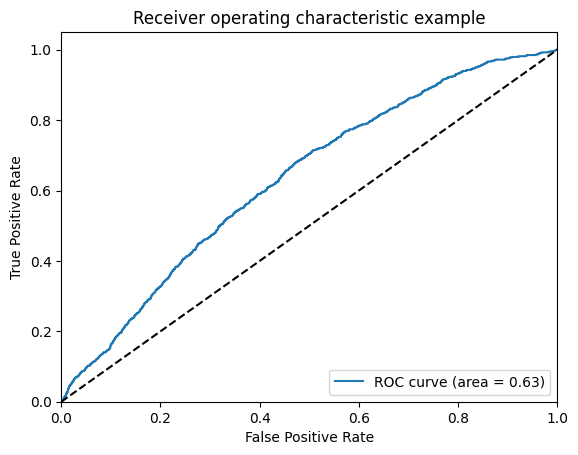

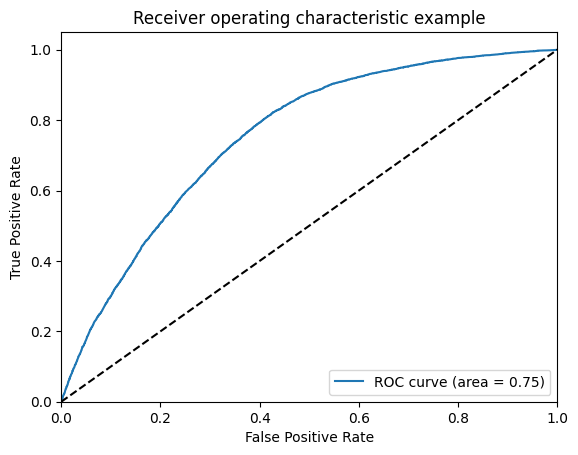

Scores
0.3739446427017147
For fold 2
              precision    recall  f1-score   support

           0       0.96      0.41      0.57     38011
           1       0.02      0.01      0.01       926
           2       0.36      0.22      0.28      7019

   micro avg       0.81      0.37      0.51     45956
   macro avg       0.45      0.21      0.29     45956
weighted avg       0.85      0.37      0.52     45956
 samples avg       0.37      0.37      0.37     45956

ROC Score:  0.7404888906409275
ROC Score:  0.6407267485223435
ROC Score:  0.7505385012608342


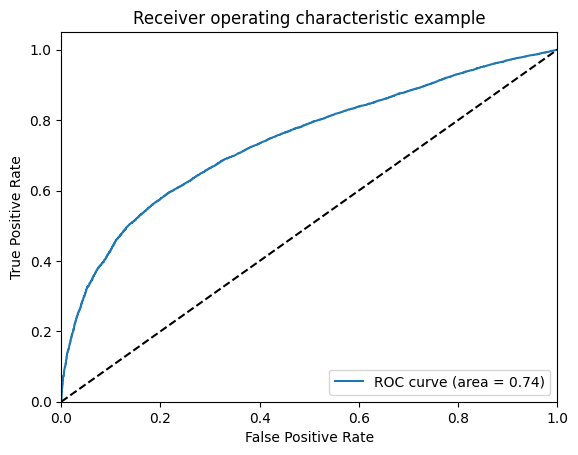

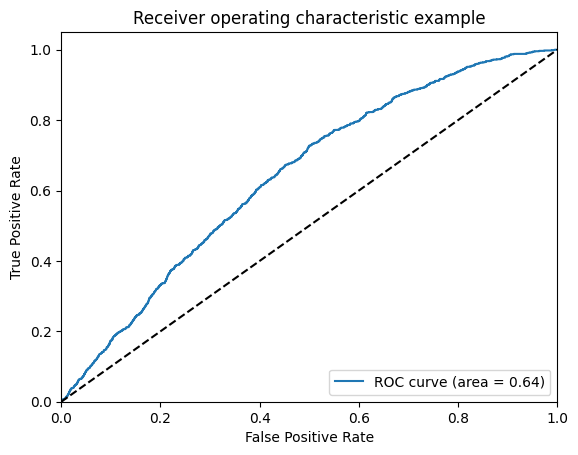

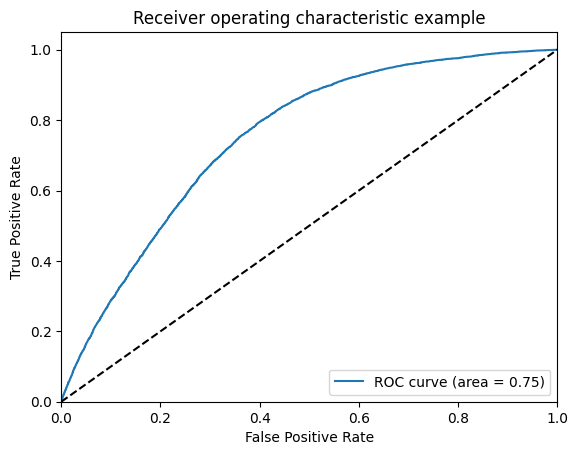

Scores
0.37109408999912963
For fold 3
              precision    recall  f1-score   support

           0       0.95      0.41      0.58     38011
           1       0.04      0.02      0.03       926
           2       0.38      0.24      0.29      7019

   micro avg       0.81      0.38      0.52     45956
   macro avg       0.46      0.22      0.30     45956
weighted avg       0.85      0.38      0.52     45956
 samples avg       0.38      0.38      0.38     45956

ROC Score:  0.7458080673179317
ROC Score:  0.6253249573478492
ROC Score:  0.7573012312095637


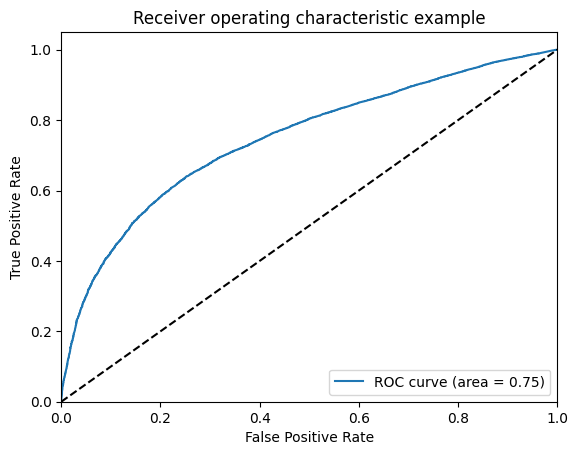

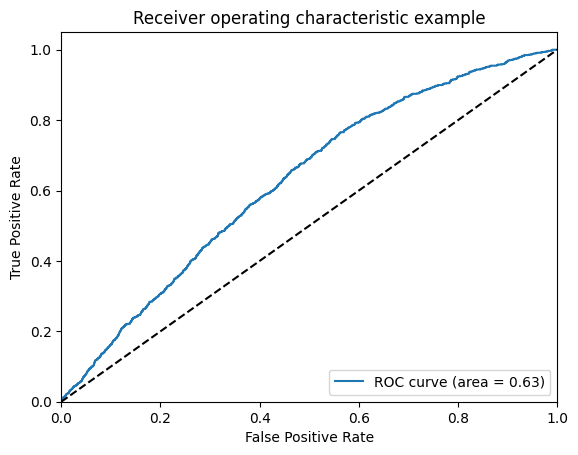

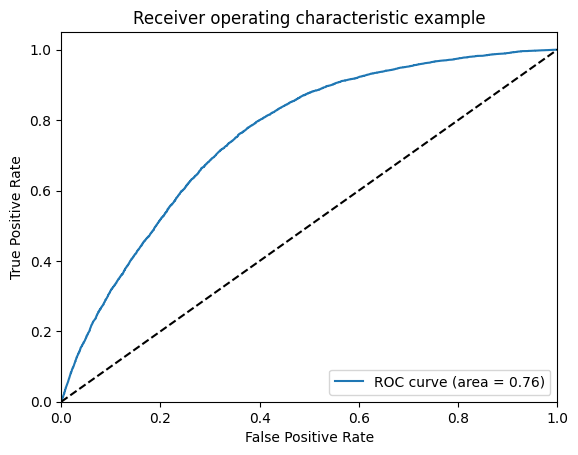

Scores
0.37424928192183826
For fold 4
              precision    recall  f1-score   support

           0       0.95      0.41      0.58     38011
           1       0.02      0.02      0.02       926
           2       0.37      0.23      0.29      7019

   micro avg       0.80      0.38      0.52     45956
   macro avg       0.45      0.22      0.30     45956
weighted avg       0.85      0.38      0.52     45956
 samples avg       0.38      0.38      0.38     45956

ROC Score:  0.7405601743683916
ROC Score:  0.616804863472348
ROC Score:  0.7521360421033386


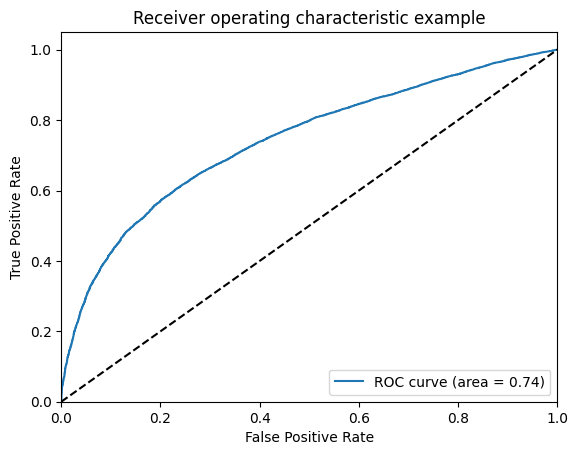

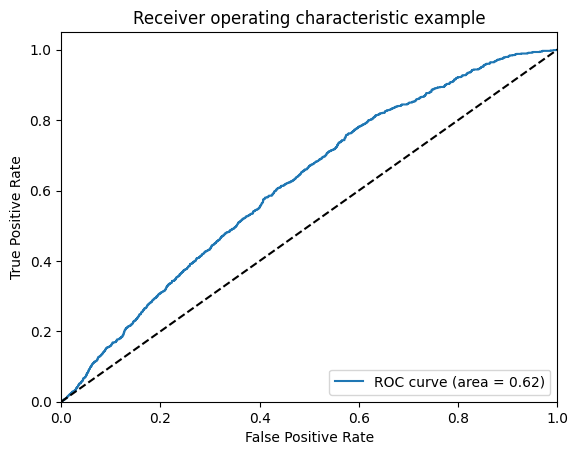

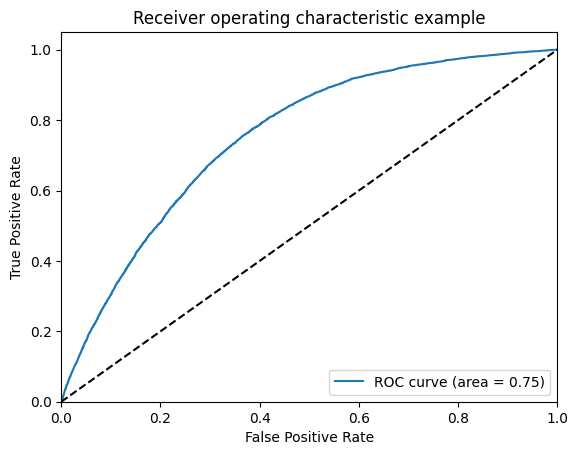

Scores
0.37592479763251807
For K = 5, Mean Accuracy Value 0.37457403752556634


In [16]:
K = 5
kf = StratifiedKFold(n_splits = K, shuffle = True, random_state = 42)
accuracyList = np.zeros(K)
for fold, (train_index, test_index) in enumerate(kf.split(X, Y)):
    X_train, Y_train = X.iloc[train_index], Y.iloc[train_index]
    X_test, Y_test = X.iloc[test_index], Y.iloc[test_index]
    
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    Y_test = binarize(Y_test)
    Y_train = binarize(Y_train)

    pca = PCA()
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)

    sm = SMOTE()
    X_train_oversampled, Y_train_oversampled = sm.fit_resample(X_train, Y_train)
    Y_train_oversampled = binarize(Y_train_oversampled)
    
    print('For fold '+str(fold))

    model = BernoulliNB()
    model = turn_multiclass(model)
    model_fit = model.fit(X_train_oversampled, Y_train_oversampled)
    Y_pred = model_fit.predict(X_test)
    print(classification_report(Y_test, Y_pred, output_dict = False))

    # Y_score = model_fit.decision_function(X_test)
    Y_proba = model.predict_proba(X_test)
    plot_roc(Y_test, Y_proba)


    acc_score = model_fit.score(X_test, Y_test)
    print('Scores')
    print(acc_score)
    accuracyList[fold] = acc_score
    # print('Explained variance is : '+str(pca.explained_variance_ratio_.sum()))
print('For K = '+str(K)+', Mean Accuracy Value '+str(np.mean(accuracyList)))

Random Forest

For fold 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  6.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  6.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  5.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


              precision    recall  f1-score   support

           0       0.90      0.76      0.83     38011
           1       0.02      0.02      0.02       926
           2       0.38      0.39      0.38      7020

   micro avg       0.79      0.69      0.74     45957
   macro avg       0.43      0.39      0.41     45957
weighted avg       0.80      0.69      0.74     45957
 samples avg       0.69      0.69      0.69     45957



[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished


ROC Score:  0.7587820184233633
ROC Score:  0.586001757464608
ROC Score:  0.7647197931760175


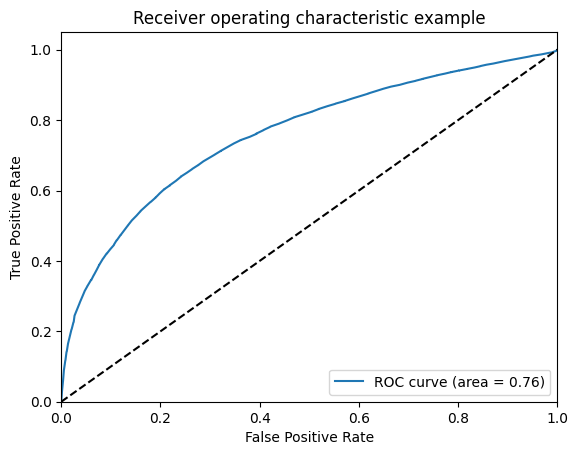

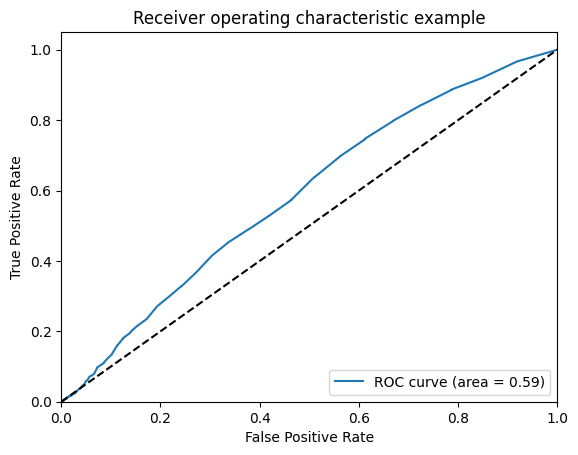

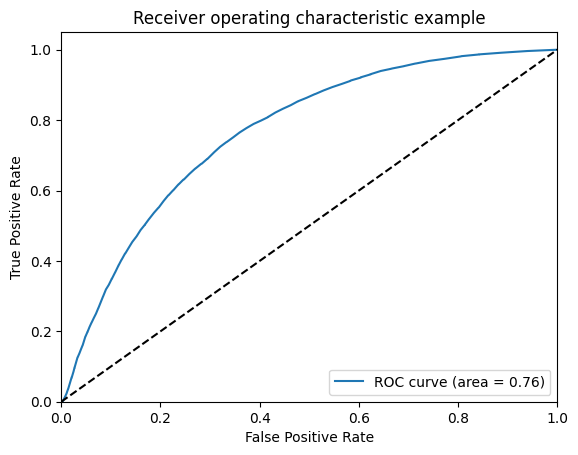

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished


Scores
0.6812237526383358
For fold 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  6.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  5.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  5.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


              precision    recall  f1-score   support

           0       0.90      0.76      0.83     38011
           1       0.03      0.02      0.02       925
           2       0.36      0.38      0.37      7020

   micro avg       0.79      0.69      0.73     45956
   macro avg       0.43      0.39      0.41     45956
weighted avg       0.80      0.69      0.74     45956
 samples avg       0.68      0.69      0.69     45956



[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished


ROC Score:  0.7543047763706704
ROC Score:  0.6185687817461484
ROC Score:  0.7594941377244389


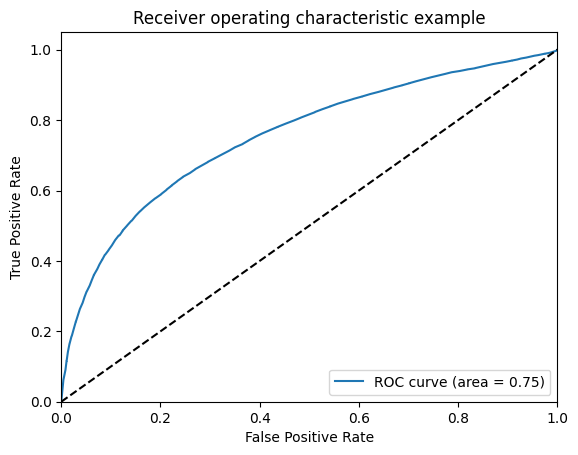

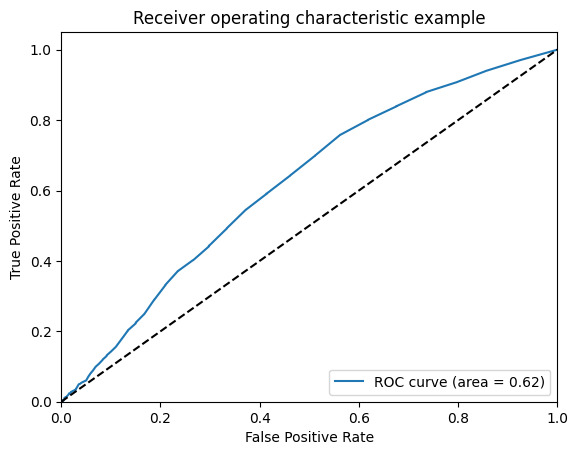

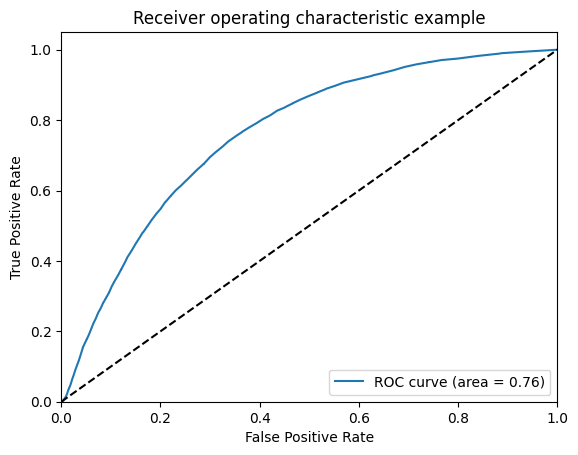

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished


Scores
0.6787361824353729
For fold 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  6.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  6.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  5.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


              precision    recall  f1-score   support

           0       0.90      0.76      0.83     38011
           1       0.02      0.02      0.02       926
           2       0.37      0.38      0.37      7019

   micro avg       0.79      0.69      0.74     45956
   macro avg       0.43      0.39      0.41     45956
weighted avg       0.80      0.69      0.74     45956
 samples avg       0.69      0.69      0.69     45956



[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished


ROC Score:  0.7553809594947003
ROC Score:  0.5899988680452533
ROC Score:  0.7595307836017123


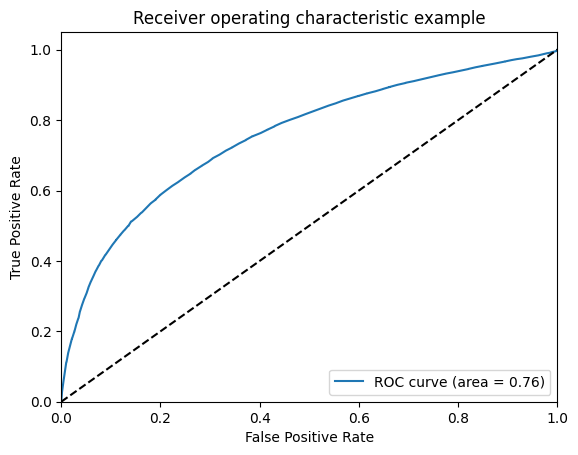

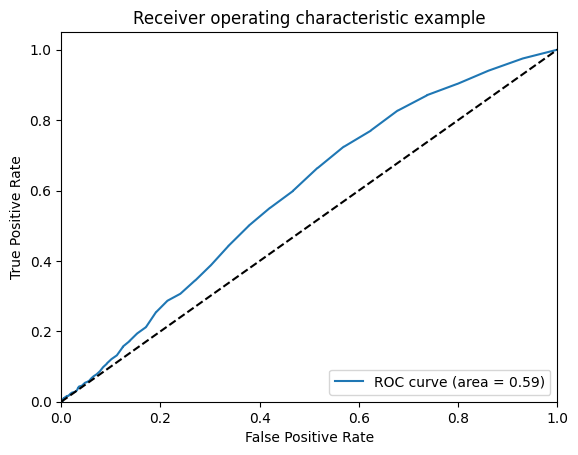

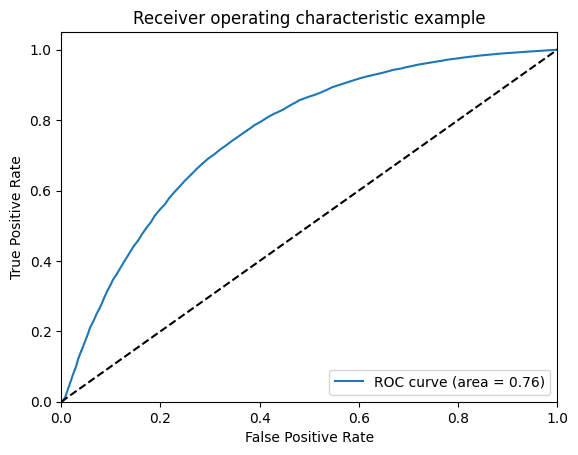

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished


Scores
0.6808033771433545
For fold 3


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  7.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  5.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  5.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


              precision    recall  f1-score   support

           0       0.90      0.76      0.83     38011
           1       0.02      0.01      0.02       926
           2       0.37      0.38      0.37      7019

   micro avg       0.79      0.69      0.74     45956
   macro avg       0.43      0.39      0.41     45956
weighted avg       0.80      0.69      0.74     45956
 samples avg       0.68      0.69      0.69     45956



[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.7s finished


ROC Score:  0.7573659468155346
ROC Score:  0.5900244329554235
ROC Score:  0.7598189535429469


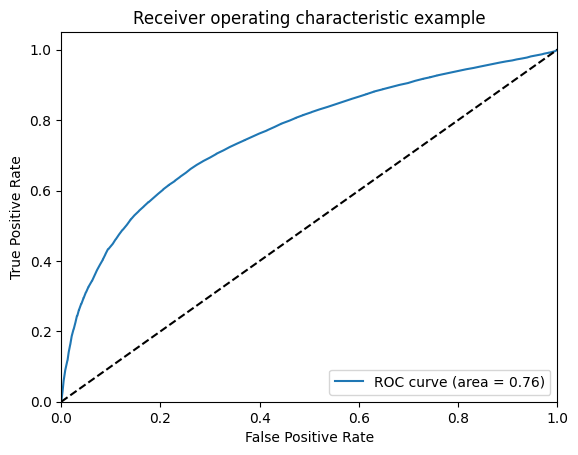

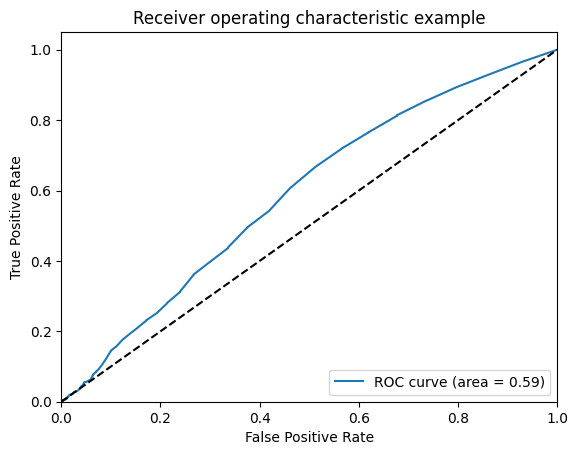

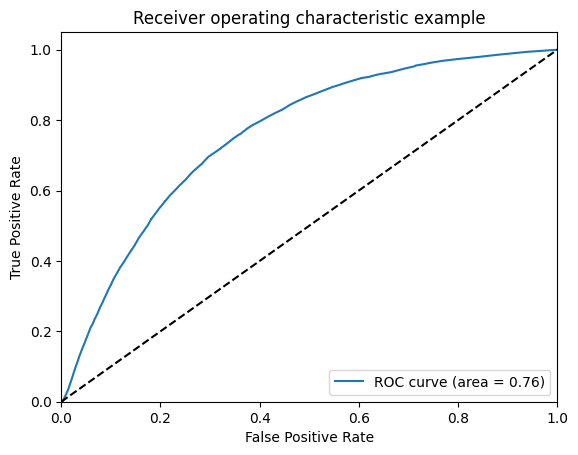

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished


Scores
0.679780659761511
For fold 4


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  6.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  5.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  5.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


              precision    recall  f1-score   support

           0       0.90      0.76      0.82     38011
           1       0.02      0.02      0.02       926
           2       0.36      0.38      0.37      7019

   micro avg       0.79      0.68      0.73     45956
   macro avg       0.43      0.38      0.40     45956
weighted avg       0.80      0.68      0.74     45956
 samples avg       0.68      0.68      0.68     45956



[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.7s finished


ROC Score:  0.7563154129193731
ROC Score:  0.591030997333671
ROC Score:  0.7603691608557831


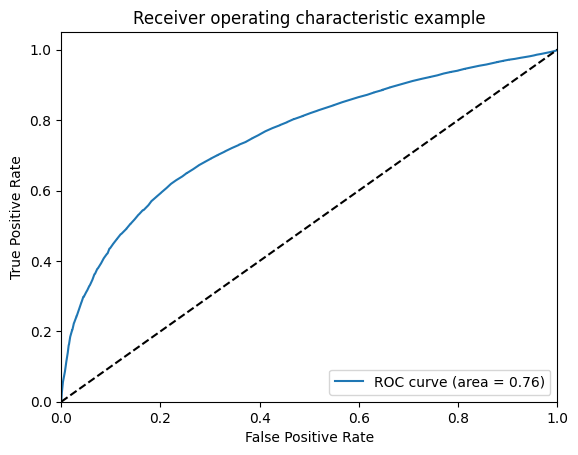

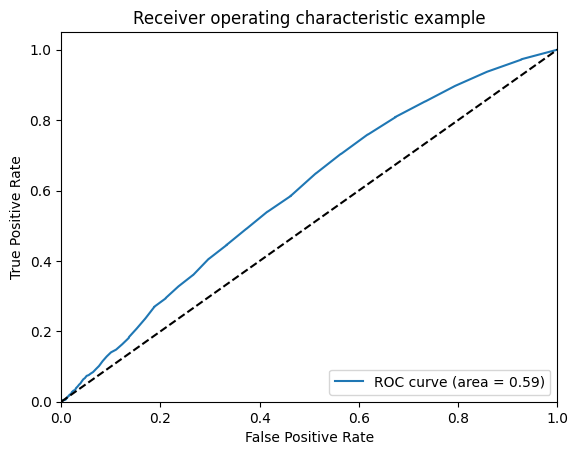

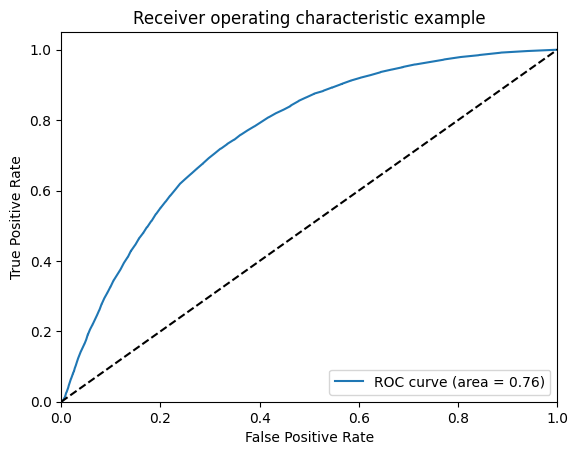

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Scores
0.6761249891200278
For K = 5, Mean Accuracy Value 0.6793337922197205


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished


In [17]:
# Applying undersampling technique : K-fold cross (where K = 5) validation and evaluating the performance
K = 5
kf = StratifiedKFold(n_splits = K, shuffle = True, random_state = 42)
accuracyList = np.zeros(K)
for fold, (train_index, test_index) in enumerate(kf.split(X, Y)):
    X_train, Y_train = X.iloc[train_index], Y.iloc[train_index]
    X_test, Y_test = X.iloc[test_index], Y.iloc[test_index]
    
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    Y_test = binarize(Y_test)
    Y_train = binarize(Y_train)

    pca = PCA()
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)

    sm = SMOTE()
    X_train_oversampled, Y_train_oversampled = sm.fit_resample(X_train, Y_train)
    Y_train_oversampled = binarize(Y_train_oversampled)
    
    print('For fold '+str(fold))

    model = RandomForestClassifier(n_estimators = 100, verbose=True)
    model = turn_multiclass(model)
    model_fit = model.fit(X_train_oversampled, Y_train_oversampled)
    Y_pred = model_fit.predict(X_test)
    print(classification_report(Y_test, Y_pred, output_dict = False))

    # Y_score = model_fit.decision_function(X_test)
    Y_proba = model.predict_proba(X_test)
    plot_roc(Y_test, Y_proba)


    acc_score = model_fit.score(X_test, Y_test)
    print('Scores')
    print(acc_score)
    accuracyList[fold] = acc_score
    # print('Explained variance is : '+str(pca.explained_variance_ratio_.sum()))
print('For K = '+str(K)+', Mean Accuracy Value '+str(np.mean(accuracyList)))

XGBoost

In [18]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
# Applying undersampling technique : K-fold cross (where K = 10) validation and evaluating the performance
from xgboost import XGBClassifier
K = 10
kf = KFold(n_splits = K, shuffle = True, random_state = 42)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Y_test = binarize(Y_test)
Y_train = binarize(Y_train)

model = XGBClassifier()
model = turn_multiclass(model)
model_fit = model.fit(X_train, Y_train)

Y_pred = model_fit.predict(X_test)
print(classification_report(Y_test, Y_pred, output_dict = False))
kf_cv_scores = cross_val_score(model, X_train, Y_train, cv=kf )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     38116
           1       0.00      0.00      0.00       906
           2       0.55      0.17      0.26      6935

   micro avg       0.84      0.83      0.83     45957
   macro avg       0.47      0.38      0.39     45957
weighted avg       0.79      0.83      0.79     45957
 samples avg       0.82      0.83      0.83     45957

K-fold CV average score: 0.82


In [1]:
# # Applying undersampling technique : K-fold cross (where K = 10) validation and evaluating the performance
# from xgboost import XGBClassifier
# K = 10
# kf = KFold(n_splits = K, shuffle = True, random_state = 42)
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# Y_test = binarize(Y_test)
# Y_train = binarize(Y_train)

# model = XGBClassifier()
# model = turn_multiclass(model)
# model_fit = model.fit(X_train, Y_train)

# Y_pred = model_fit.predict(X_test)
# print(classification_report(Y_test, Y_pred, output_dict = False))
# kf_cv_scores = cross_val_score(model, X_train, Y_train, cv=kf )
# print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

AdaBoost

For fold 0
              precision    recall  f1-score   support

           0       0.96      0.49      0.65     63352
           1       0.04      0.08      0.05      1543
           2       0.44      0.35      0.39     11699

   micro avg       0.79      0.46      0.58     76594
   macro avg       0.48      0.31      0.36     76594
weighted avg       0.86      0.46      0.60     76594
 samples avg       0.46      0.46      0.46     76594

ROC Score:  0.7836319488473948
ROC Score:  0.6125497612584774
ROC Score:  0.7984365810410724


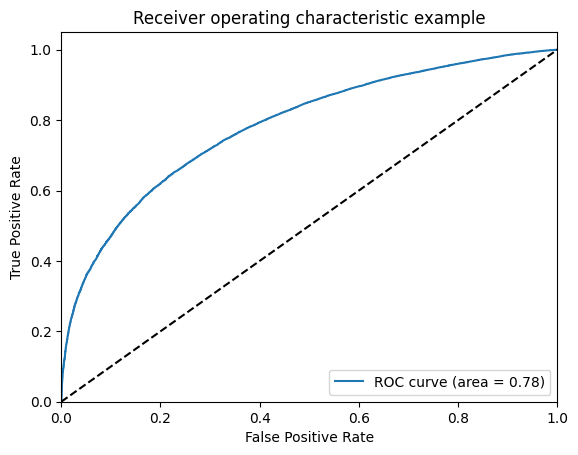

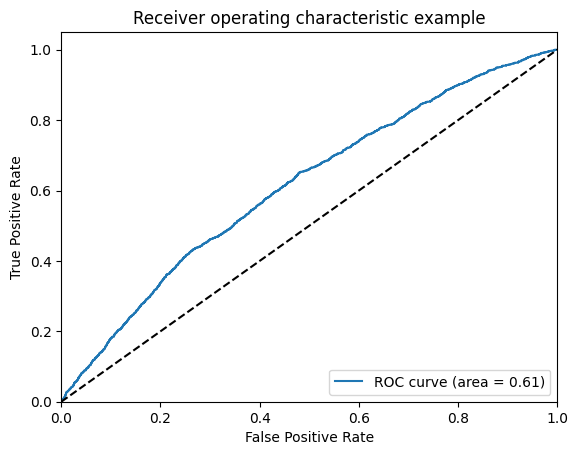

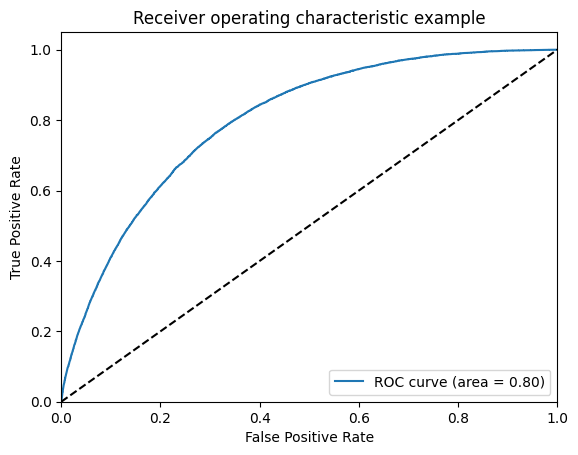

Scores
0.45755542209572553
For fold 1
              precision    recall  f1-score   support

           0       0.96      0.49      0.65     63352
           1       0.03      0.07      0.04      1543
           2       0.44      0.34      0.38     11699

   micro avg       0.79      0.46      0.58     76594
   macro avg       0.48      0.30      0.36     76594
weighted avg       0.86      0.46      0.59     76594
 samples avg       0.45      0.46      0.45     76594

ROC Score:  0.7861865449229483
ROC Score:  0.6210580261891994
ROC Score:  0.7997169788848189


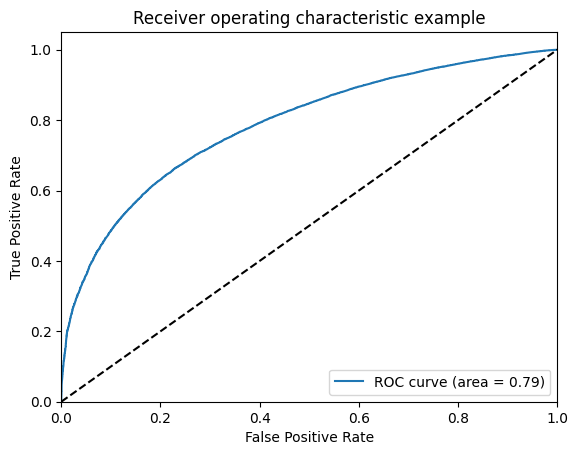

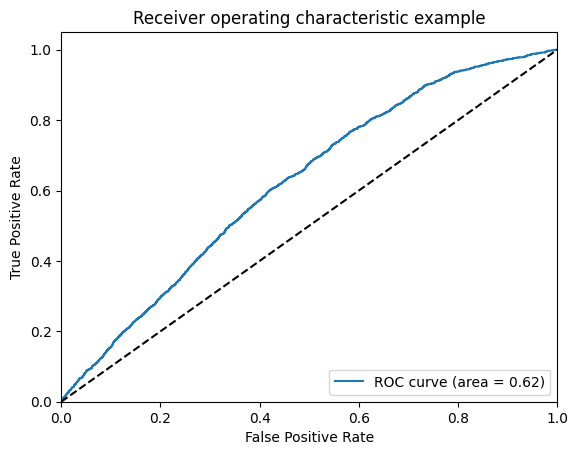

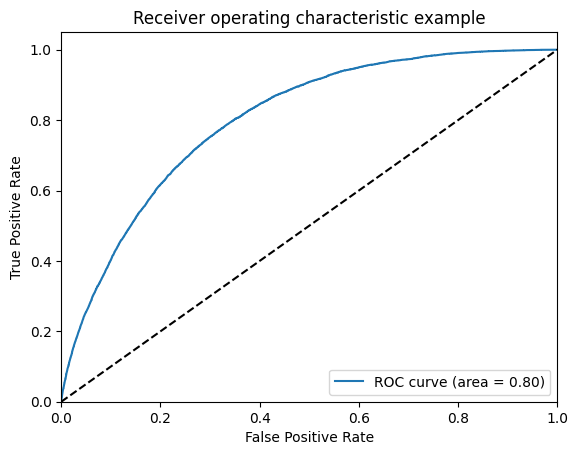

Scores
0.45170639997911066
For fold 2
              precision    recall  f1-score   support

           0       0.95      0.50      0.66     63351
           1       0.03      0.07      0.04      1543
           2       0.44      0.35      0.39     11699

   micro avg       0.78      0.47      0.59     76593
   macro avg       0.47      0.31      0.36     76593
weighted avg       0.86      0.47      0.60     76593
 samples avg       0.47      0.47      0.47     76593

ROC Score:  0.7814937385732129
ROC Score:  0.6081496457535547
ROC Score:  0.7946553542865842


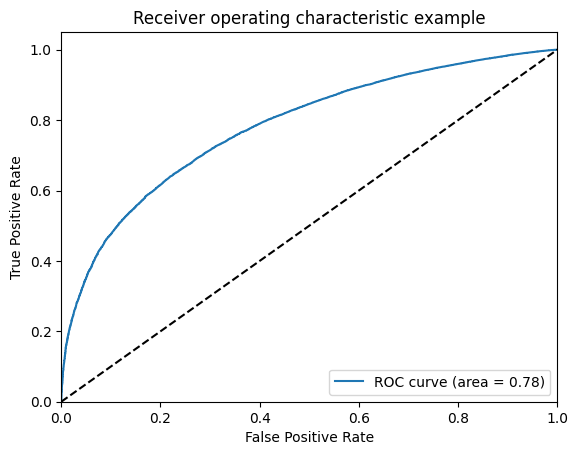

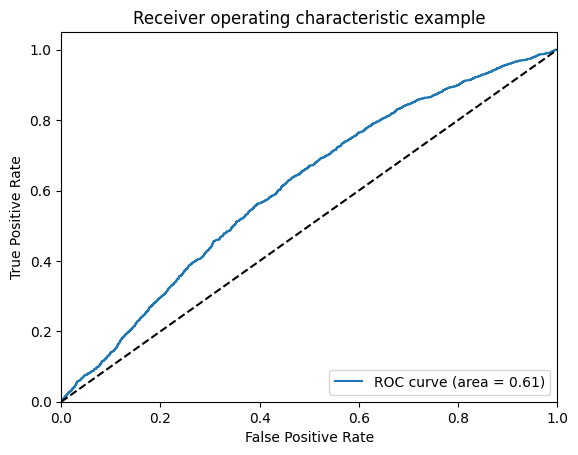

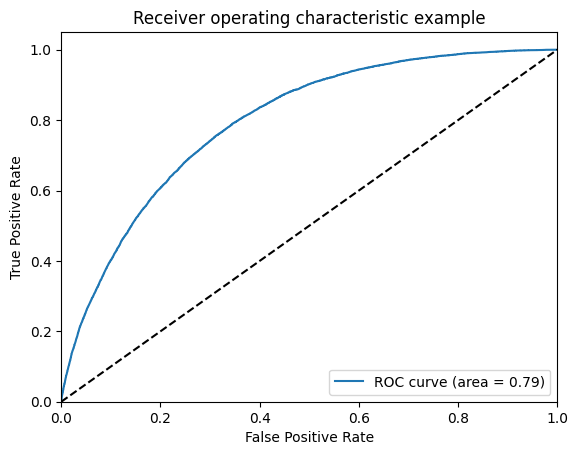

Scores
0.4632799341976421
For K = 3, Mean Accuracy Value 0.45751391875749275


In [ ]:
# Applying undersampling technique : K-fold cross (where K = 10) validation and evaluating the performance
K = 3
kf = StratifiedKFold(n_splits = K, shuffle = True, random_state = 42)
accuracyList = np.zeros(K)
for fold, (train_index, test_index) in enumerate(kf.split(X, Y)):
    X_train, Y_train = X.iloc[train_index], Y.iloc[train_index]
    X_test, Y_test = X.iloc[test_index], Y.iloc[test_index]
    
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    Y_test = binarize(Y_test)
    Y_train = binarize(Y_train)

    pca = PCA()
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    
    print('For fold '+str(fold))
    sm = SMOTE()
    X_train_oversampled, Y_train_oversampled = sm.fit_resample(X_train, Y_train)
    Y_train_oversampled = binarize(Y_train_oversampled)
    model = AdaBoostClassifier(n_estimators=100)
    model = turn_multiclass(model)
    model_fit = model.fit(X_train_oversampled, Y_train_oversampled)
    Y_pred = model_fit.predict(X_test)
    print(classification_report(Y_test, Y_pred, output_dict = False))

    Y_score = model_fit.decision_function(X_test)
    # print(Y_score)
    # Y_score = model_fit.decision_function(X_test)
    # Y_proba = model.predict_proba(X_test)
    plot_roc(Y_test, Y_score)

    acc_score = model_fit.score(X_test, Y_test)
    print('Scores')
    print(acc_score)
    accuracyList[fold] = acc_score
    # print('Explained variance is : '+str(pca.explained_variance_ratio_.sum()))
    
    # save the model
    joblib.dump(model_fit, 'adaboost_model.pkl')
    
print('For K = '+str(K)+', Mean Accuracy Value '+str(np.mean(accuracyList)))